In [ ]:
# 동시 출현 네트워크 구성
# 목표: 특정 단어가 문장에서 함께 등장하는 단어들과 얼마나 자주 연결되는지 시각화

# 딕셔너리 먼저 저장

from collections import defaultdict
import pandas as pd

# 분석할 파일 목록
file_paths = {
    "이준석": "lee_junseok_tagged_filtered_ver2.csv",
    "이재명": "lee_jaemyung_tagged_filtered.csv",
    "김문수": "kim_moonsu_tagged_filtered.csv"
}

# 정치인별 공출현 딕셔너리 저장용
cooccurrence_dict = {}

for name, path in file_paths.items():
    df = pd.read_csv(path)
    
    # 공출현 카운트 초기화
    cooccurrence = defaultdict(lambda: defaultdict(int))
    
    for sentence in df['tagged'].dropna():
        tokens = [token.rsplit("(", 1)[0] for token in sentence.split() if '(' in token]
        unique_tokens = list(set(tokens))  # 중복 제거

        for i in range(len(unique_tokens)):
            for j in range(i + 1, len(unique_tokens)):
                w1, w2 = unique_tokens[i], unique_tokens[j]
                cooccurrence[w1][w2] += 1
                cooccurrence[w2][w1] += 1

    cooccurrence_dict[name] = cooccurrence  # 저장

# ✅ cooccurrence_dict 안에 정치인별 공출현 네트워크가 저장됩니다!
# 예시 접근: cooccurrence_dict['이준석']['정치']['개혁']  → '정치'와 '개혁'이 함께 등장한 횟수



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


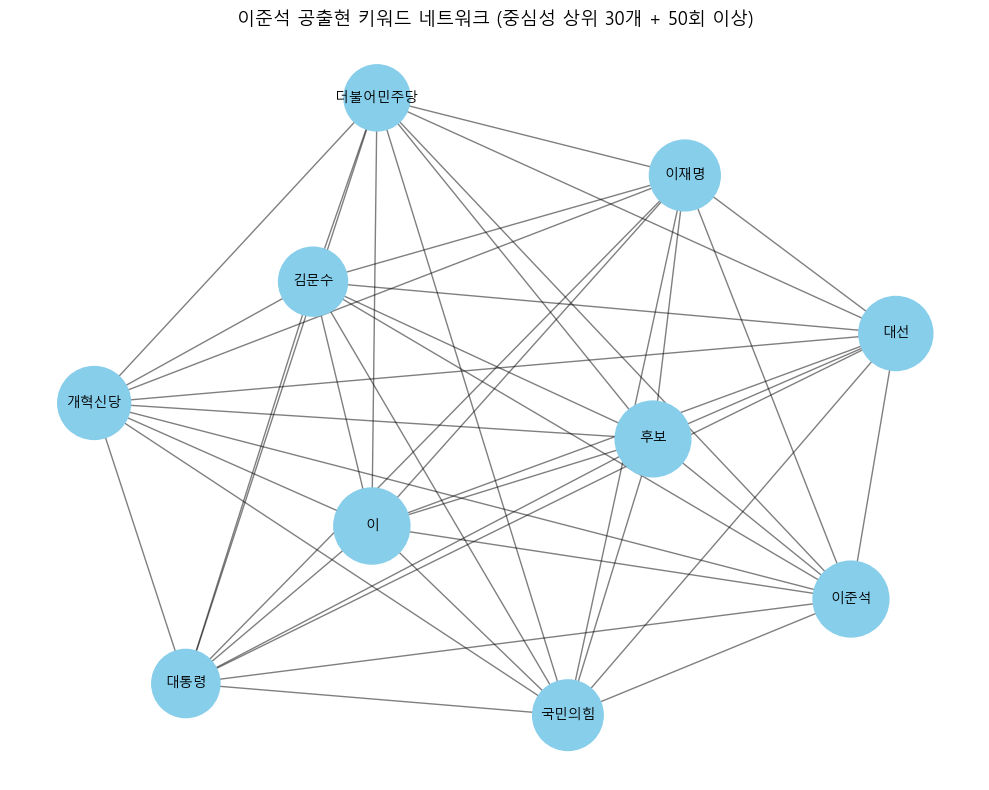

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

# 시각화할 대상 정치인 이름
target = "이준석"

# 공출현 딕셔너리에서 해당 정치인 것만 가져오기
cooccur = cooccurrence_dict[target]

# NetworkX 그래프 초기화
G = nx.Graph()
threshold = 50  # ✅ 공출현 최소 기준을 높임

# 불용어 정의
stopwords = {'대하', '주', '두', '되', '위하', '하', '없', '같', '말', '있', '않', '아니', '전', '그', '보', '않', '이날', '선거', '한', '가', '기자', '안'}

# 간선 추가 + 불용어 제거
for w1, neighbors in cooccur.items():
    if w1 in stopwords:
        continue
    for w2, count in neighbors.items():
        if w2 in stopwords:
            continue
        if count >= threshold:
            G.add_edge(w1, w2, weight=count)

# 중심성 계산
degree_dict = nx.degree_centrality(G)

# ✅ 중심성이 높은 노드 상위 10개만 추출
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:10]
H = G.subgraph(top_nodes)

# 노드 크기 = 연결 중심성 기반
node_size = [degree_dict[n] * 3000 for n in H.nodes]

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 레이아웃 & 시각화
pos = nx.spring_layout(H, k=1.2, seed=42)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_color='skyblue', node_size=node_size)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_family='Malgun Gothic', font_size=10)

plt.title(f"{target} 공출현 키워드 네트워크 (중심성 상위 30개 + {threshold}회 이상)", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# 중심성 계산
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# | 중심성 종류              | 의미                             | 어떤 단어가 높게 나오는지      |
# | ---------------------- | -------------------------------- | -------------------------- |
# | **Degree 중심성**       | 연결된 단어 수 (연결된 간선 수)      | 가장 많이 공출현된 단어       |
# | **Betweenness 중심성**  | 다른 단어쌍 사이의 '중간 경유지' 역할 | 연결다리, 중재자 역할         |
# | **Closeness 중심성**    |  다른 단어들과 얼마나 가까운지       | 네트워크 전체와 잘 연결된 단어  |
# | **Eigenvector 중심성**  | 영향력 있는 단어들과 연결되어 있는지  | '영향력 있는 친구가 많은 단어' |


# 정리: 중심성 지표를 데이터프레임으로 보기
df_centrality = pd.DataFrame({
    "Degree": degree_centrality,
    "Betweenness": betweenness,
    "Closeness": closeness,
    "Eigenvector": eigenvector
})

# 상위 단어 보기
print(df_centrality.sort_values("Degree", ascending=False).head(50))


          Degree  Betweenness  Closeness  Eigenvector
이       1.000000     0.125459   1.000000     0.100167
이준석     0.993730     0.113988   0.993769     0.100150
후보      0.990596     0.110880   0.990683     0.100136
대선      0.946708     0.083725   0.949405     0.099811
개혁신당    0.918495     0.071596   0.924638     0.099522
이재명     0.866249     0.054519   0.882028     0.098862
국민의힘    0.859979     0.053008   0.877177     0.098735
김문수     0.822362     0.043963   0.849157     0.098108
대통령     0.803553     0.041578   0.835808     0.097636
더불어민주당  0.754441     0.031714   0.802852     0.096706
서울      0.607106     0.013291   0.717929     0.092749
정치      0.584117     0.011819   0.706273     0.091492
김       0.547544     0.008917   0.688489     0.090176
지       0.529781     0.007341   0.680171     0.089986
지나      0.527691     0.007373   0.679205     0.089773
지지      0.525601     0.008418   0.678242     0.088368
나오      0.510972     0.006382   0.671579     0.088970
열리      0.505747     0.00618


📌 Degree 중심성 기준 상위 50개 단어


,Degree
이,1.000000
이준석,0.993730
후보,0.990596
대선,0.946708
개혁신당,0.918495
이재명,0.866249
국민의힘,0.859979
김문수,0.822362
대통령,0.803553
더불어민주당,0.754441



📌 Betweenness 중심성 기준 상위 50개 단어


,Betweenness
이,0.125459
이준석,0.113988
후보,0.110880
대선,0.083725
개혁신당,0.071596
이재명,0.054519
국민의힘,0.053008
김문수,0.043963
대통령,0.041578
더불어민주당,0.031714



📌 Closeness 중심성 기준 상위 50개 단어


,Closeness
이,1.000000
이준석,0.993769
후보,0.990683
대선,0.949405
개혁신당,0.924638
이재명,0.882028
국민의힘,0.877177
김문수,0.849157
대통령,0.835808
더불어민주당,0.802852



📌 Eigenvector 중심성 기준 상위 50개 단어


,Eigenvector
이,0.100167
이준석,0.100150
후보,0.100136
대선,0.099811
개혁신당,0.099522
이재명,0.098862
국민의힘,0.098735
김문수,0.098108
대통령,0.097636
더불어민주당,0.096706


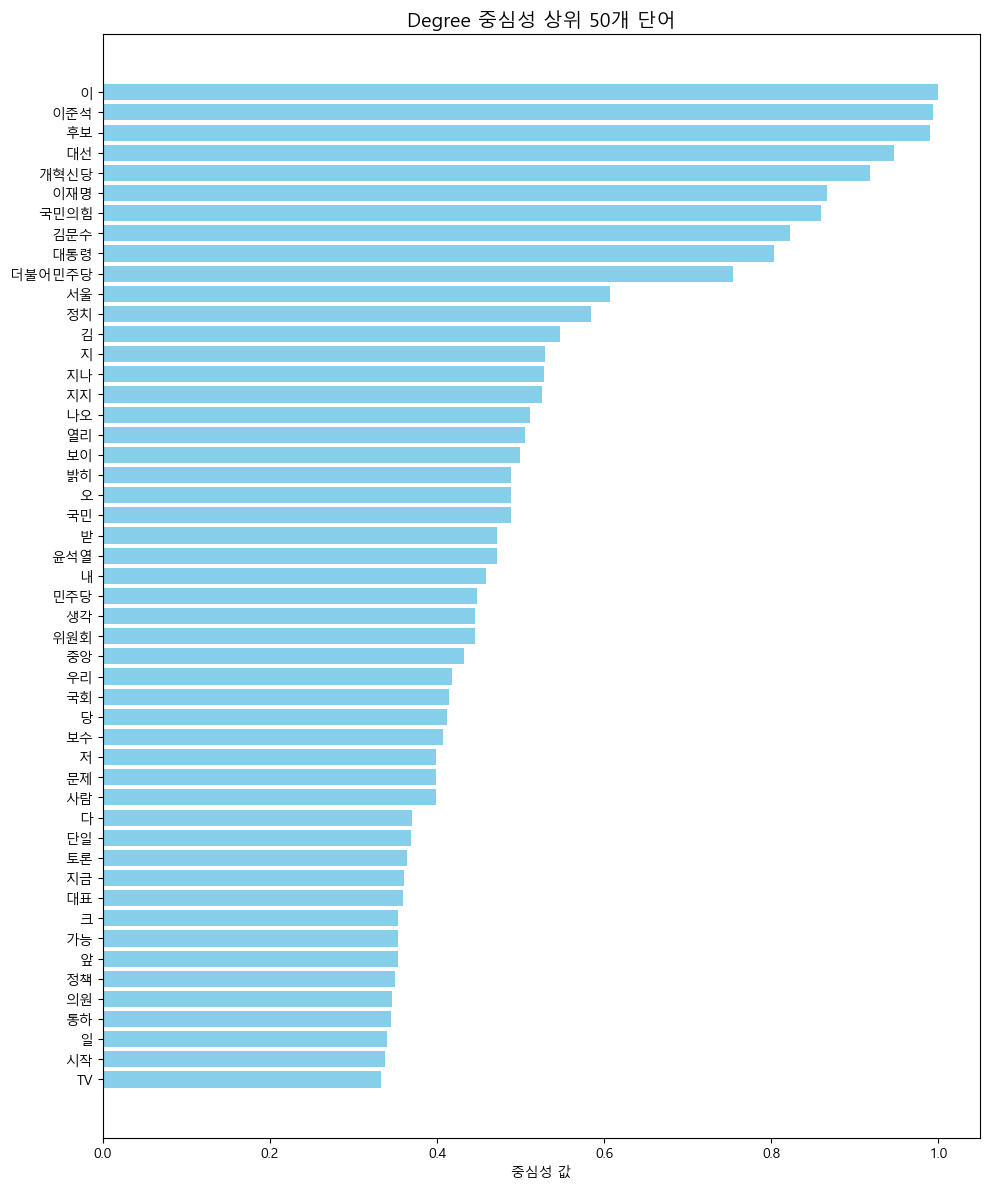

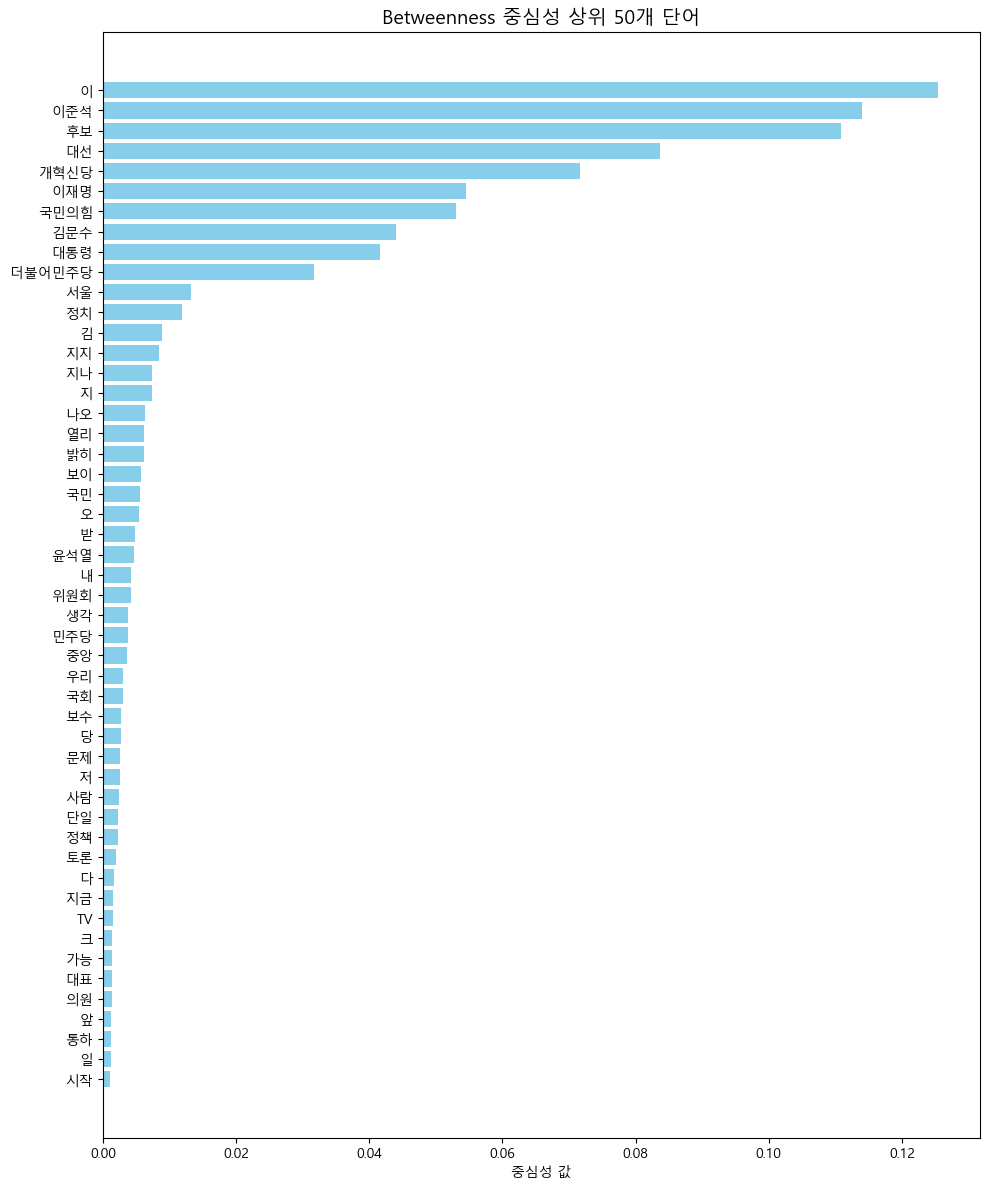

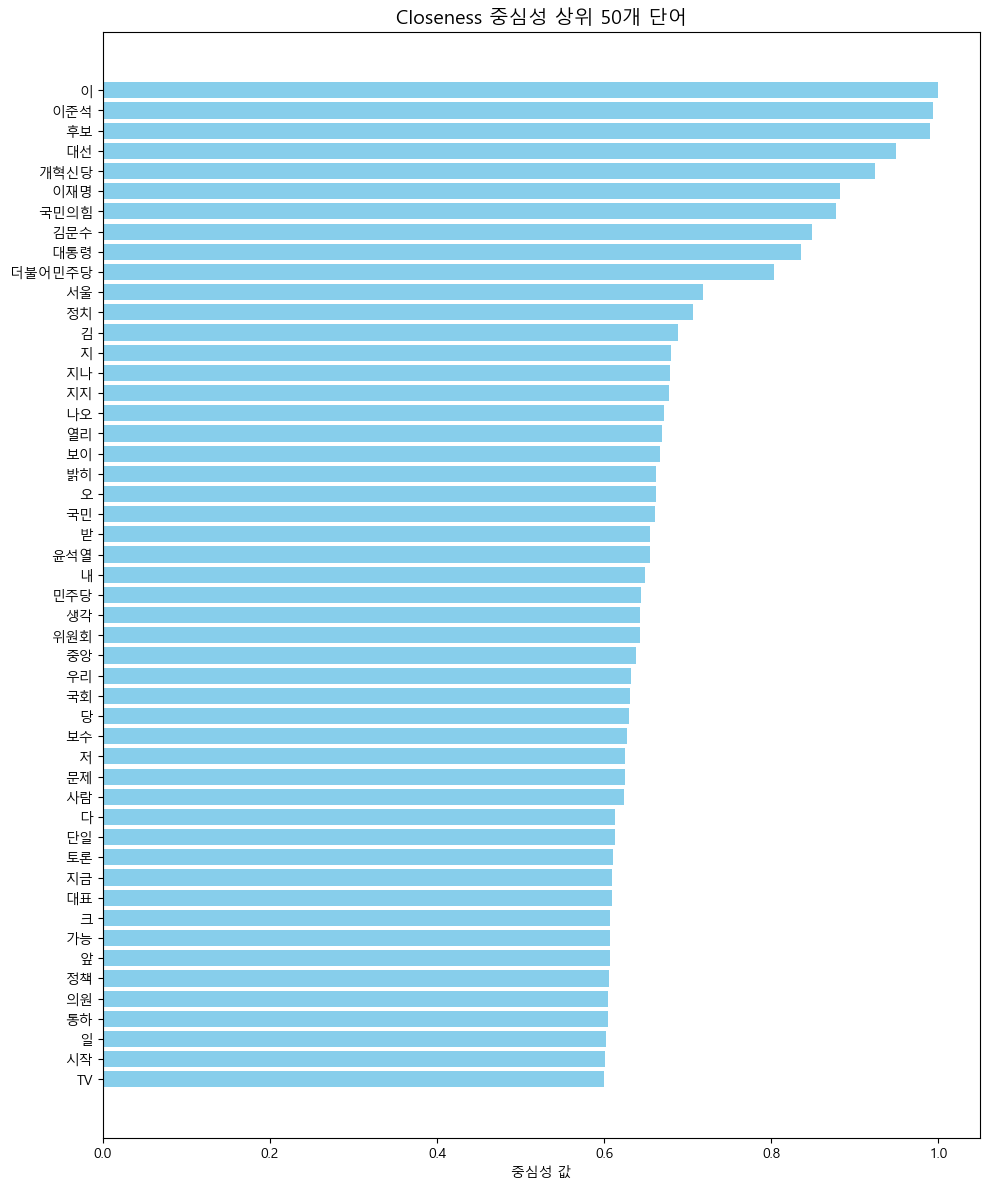

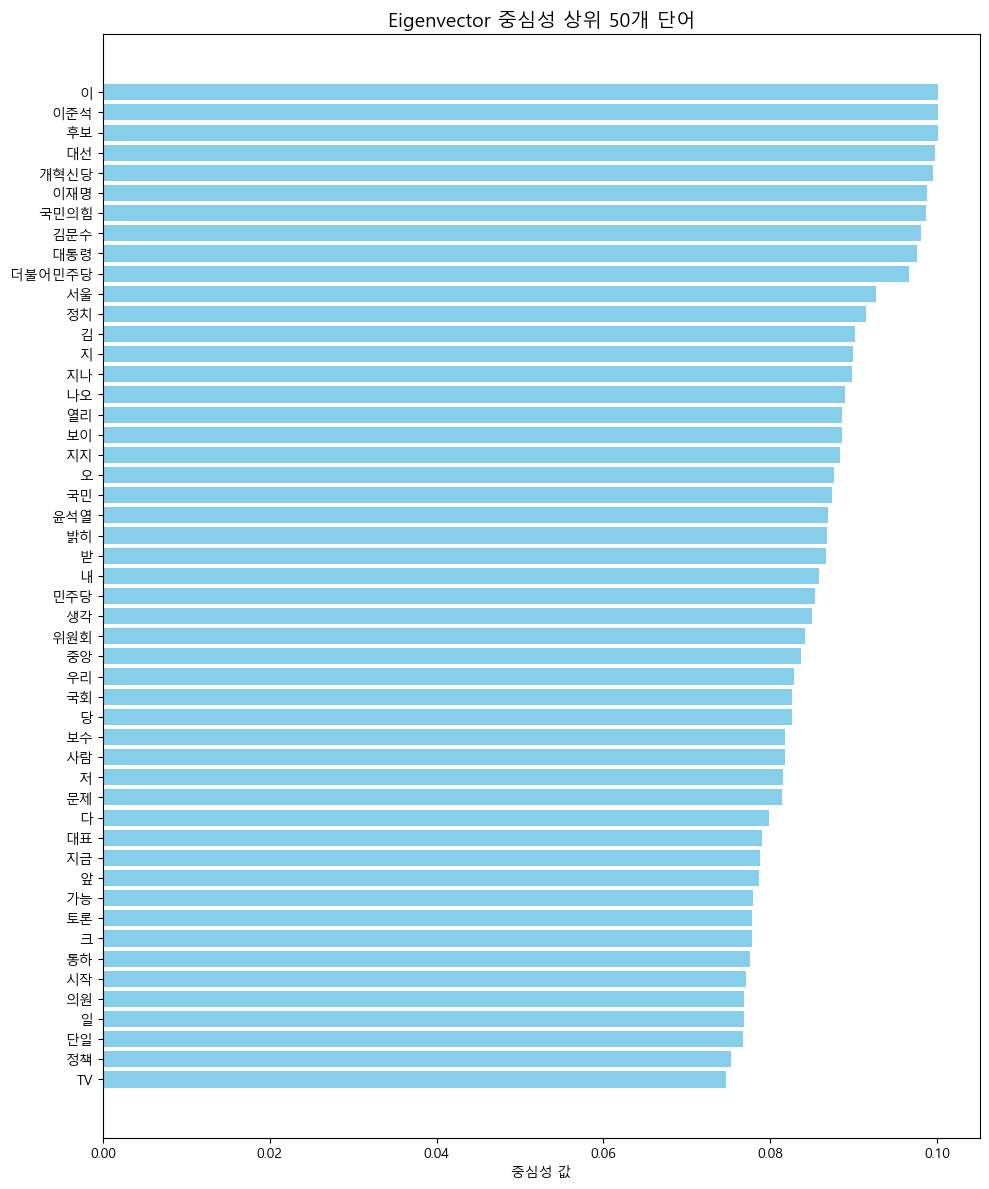

In [14]:
# 중심성 지표별 상위 50개 단어 출력
for col in df_centrality.columns:
    print(f"\n📌 {col} 중심성 기준 상위 50개 단어")
    display(df_centrality[[col]].sort_values(by=col, ascending=False).head(50))

for col in df_centrality.columns:
    top_50 = df_centrality[col].sort_values(ascending=False).head(50)
    
    plt.figure(figsize=(10, 12))
    plt.barh(top_50.index[::-1], top_50.values[::-1], color='skyblue')
    plt.title(f"{col} 중심성 상위 50개 단어", fontsize=14)
    plt.xlabel("중심성 값")
    plt.tight_layout()
    plt.show()